# K-means clustering
In the lecture, we saw that k-means is an unsupervised clustering algorithm. Recall that the algorithm runs as follows:

Given a set of datapoints drawn from $\Omega=\mathbb{R}^n$:

1. Randomly partition the set of datapoints into $k$ sets.
2. For each set $P$ calculate its mean vector:
$$
\hat{x}_P=\left( \frac{\sum_{\vec{x} \in P} x_1}{|P|}, \ldots,\frac{\sum_{\vec{x} \in P} x_i}{|P|} \ldots, \frac{\sum_{\vec{x} \in P} x_n}{|P|}  \right)
$$
3. For each datapoint evaluate the squared Euclidean distance from each of the mean vectors e.g. $||\vec{x}-\hat{x}_P ||^2$. Reallocate the datapoint to the partition set the mean of which it is closest to.
4. If the partition sets remain unchanged then stop.  Else go to 2.


## Implementing $k$-means

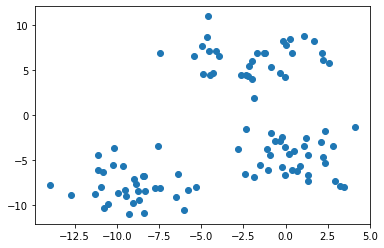

In [2]:
# The following code creates some artificial data and plots it
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random

X, y = make_blobs(centers=3,n_samples=100, cluster_std=2, random_state=100)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

Implement a function `kmeans` that takes a value $k$ and the data $X$, clusters the data, and returns the centroids and the labels of the data

In [3]:
### 定义欧几里得距离函数
def Euclidean_distance(point1,point2):
  return np.sqrt(np.sum((point1-point2)**2))

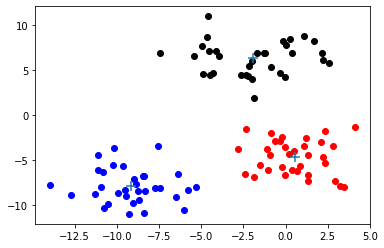

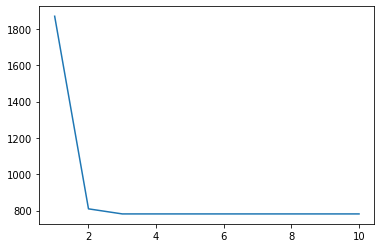

In [4]:
def kmeans(k, X, iters=10):
    
    # 首先对样本个数进行统计
    m = X.shape[0]  
    
    # 损失函数
    Cost = []

    # 接下来先要随机设置每个clusters的中心点center的位置，即对中心点做初始化
    centers = {}
    for index, i in enumerate(random.sample(range(m),k)):
      centers[index] = X[i]

    # 接下来就是对数据进行迭代
    for i in range(iters):

      #对簇进行初始化，一共有K个簇,每个簇都初始化一个空列表
      clusters = {}
      for j in range(k):
        clusters[j] = [] 

      #记录损失函数
      loss = 0

      # 首先计算每一个样本到每个簇的中心点的距离,选择距离最小的值，并将该样本分配给对应的中心点所在的簇
      for sample in X:

        #用来存储每一个点到各簇中心点的距离，并返回最小值的索引
        distances = []  

        for center_point in centers:
          distances.append(Euclidean_distance(sample,centers[center_point]))

        #遍历查询每一个样本距离各个簇中心距离中最小的点
        min_index = distances.index(min(distances))
        
        #遍历每一个点的损失，并累加,损失函数是 sum of squared distances
        loss = loss + (min(distances)**2) 

        #该索引对应的其实就是簇的索引，将该样本输入至该簇
        clusters[min_index].append(sample)
      
      # 记录损失函数
      Cost.append(loss)

      # 更新每一个簇的center
      for c in range(k):
        centers[c] = np.mean(clusters[c],axis=0)

    # return the centres and the labels.
    return centers, clusters, Cost

# Plot the centroids on the data. Are they as you would expect?
centers, clusters, Cost = kmeans(3, X)
centers = list(centers.values())
centers = np.array(centers)
clu_1 = np.array(clusters[0])
clu_2 = np.array(clusters[1])
clu_3 = np.array(clusters[2])

# 画出图像
fig1, ax = plt.subplots()
ax.scatter(clu_1[:,0], clu_1[:,1],c='r')
ax.scatter(clu_2[:,0], clu_2[:,1],c='b')
ax.scatter(clu_3[:,0], clu_3[:,1],c='k')
ax.scatter(centers[:,0],centers[:,1],s=100,marker='+')

fig1, cost = plt.subplots()
Cost = np.array(Cost)
cost.plot(range(1,11),Cost)

## Using the $k$-means function from scikit-learn
Scikit-learn has $k$-means built in. We import it using the command `from sklearn.cluster import KMeans`. Look at the documentation for KMeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#). The KMeans estimator has 4 attributes. What are they?

The attributes are:
1. 
cluster_centers: ndarray of shape (n_clusters, n_features)
2. labels: ndarray of shape (n_samples,)
3. inertia_: float Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
4. n_iter_int:
Number of iterations run.

Which attribute would you use if you wanted to look at the labels assigned to the datapoints? What if you wanted to look at the centroids? What would you use the attribute `inertia_` for?

### Generating elbow plots
We will run $k$ means over our toy dataset for multiple values of $k$ and generate an elbow plot. To do this we can use the attribute `inertia_`. This attribute measures the within-cluster sum of squares, or the variance of each cluster, and the $k$ means algorithm works to minimize this quantity. The within-cluster sum of squares is defined as:
$$\sum_{j=1}^k\sum_{x \in P_j}||x - \mu_j||^2$$
To generate the elbow plot, we run $k$ means for values of $k$ from 1 to 10, and plot the inertia at each point. If there is a clear 'elbow' in the plot, then this gives us the optimal value of $k$. Do you see a clear 'elbow' in the plot? If so, what is the optimal value of $k$?
    

Text(0.5, 1.0, 'The elbow method showing the optimal k')

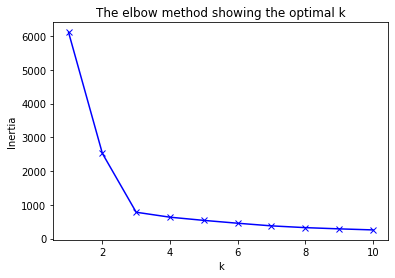

In [5]:
# Import KMeans from sklearn.cluster, 、
# 该方法的目的是找到最合适的聚类K的值，其目的是比较不同K最终的损失函数有什么区别
from sklearn.cluster import KMeans

# Set up a variable to store the inertias
inertias = []

K = 10

# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data
    kmeans.fit(X)

    # Store the value of the inertia for this value of k
    inertias.append(kmeans.inertia_)

# Plot the elbow
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

# Clustering the iris dataset
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). There are four features corresponding to the length and the width of the sepals and petals, in centimetres. Typically, the Iris data set is used as a classification problem, but by considering only the 4-D input feature space we can also apply clustering algorithms to it.

In [6]:
# Import the iris dataset, and save the data into a variable X 
# (take a look at the documentation here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
from sklearn.datasets import load_iris

# 导入数据，该数据集为花卉数据集，包含3个类，每个类有50个样本，每个样本有4个特征
data_ = load_iris()
X = data_.data
Y = data_.target
print(X.shape)

(150, 4)


Let's begin by assuming that since there are 3 types of iris, then there may be 3 clusters. Instantiate a $k$-means classifier with 3 clusters, and fit it to the data. Print out the centroids. You can visualise the resulting clusters by generating scatter plots projected on 2 dimensions. Try generating scatter plots for various combinations of features.

**Extra question** Generate one large plot with subplots for each combination of features.

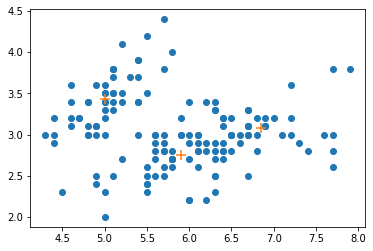

In [7]:
# Fit the iris dataset
K = 3

# Instantiate the KMeans class with k clusters
iris_kmeans = KMeans(n_clusters=K)
    
# Fit the model to the data
iris_kmeans.fit(X)

# Make a scatter plot of the data on the first two axes
# 因为是四维的特征，先看一下第一个特征和第二个特征的聚合情况
fig2, iris_ax = plt.subplots()
iris_ax.scatter(X[:,0], X[:,1])  
iris_ax.scatter(iris_kmeans.cluster_centers_[:,0],iris_kmeans.cluster_centers_[:,1],s=100,marker='+')

Generate an elbow plot for this data set. To what extent does this elbow plot support the assumption that there are three clusters present in the data?

Text(0.5, 1.0, 'The elbow method showing the optimal k')

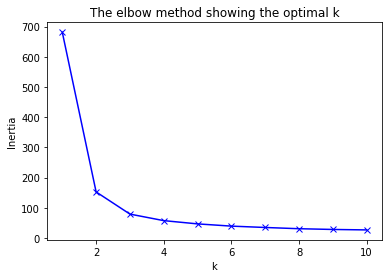

In [8]:
# Generate an elbow plot for this dataset
# Set up a variable to store the inertias
inertias = []

K = 10

# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    iris_kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data
    iris_kmeans.fit(X)

    # Store the value of the inertia for this value of k
    inertias.append(iris_kmeans.inertia_)

# Plot the elbow
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')  